# Experimentación de parámetros

In [173]:
import main as m
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

dataset = pd.read_csv("dataset.csv")

y = dataset["ozone"].to_numpy()
X = dataset[["radiation","temperature","wind"]].to_numpy()
plt.rc('axes', labelsize=18, titlesize=20)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

## Experimentación de vecinos

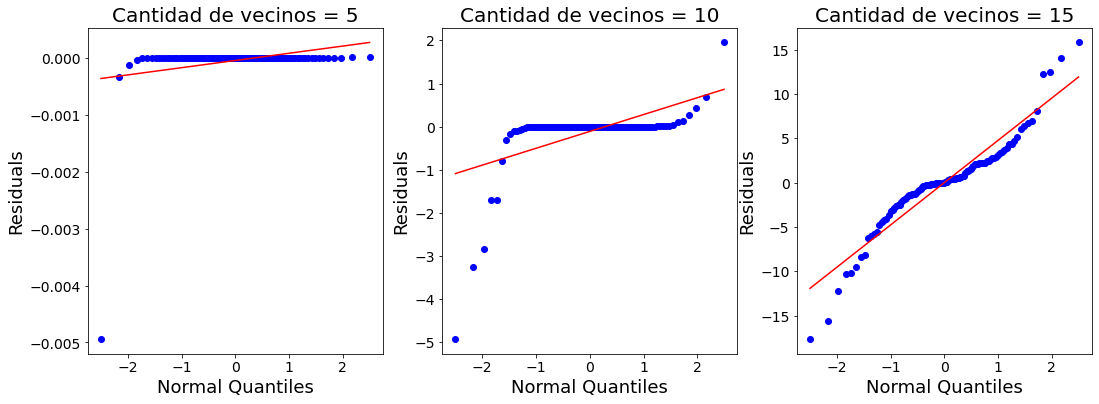

In [174]:
plt.rcParams["figure.figsize"] = (18, 6)
grado = 2
qs = [5, 10, 15]
for idx, q in enumerate(qs):
    y_res = m.fit(X, y, q, grado)
    dataset["residuo"] = y - y_res
    axis = plt.subplot(131+idx)
    res = stats.probplot(dataset["residuo"], dist="norm", plot=plt)
    axis.set_xlabel("Normal Quantiles")
    axis.set_title(f"Cantidad de vecinos = {q}")
    axis.set_ylabel("Residuals")
#plt.tight_layout()
#plt.savefig("img/fig4a_vec.svg")
plt.show()

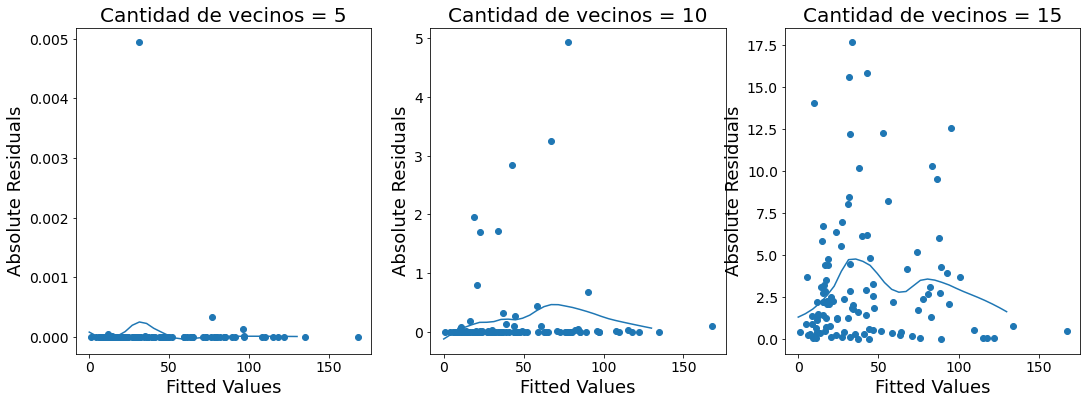

In [175]:
fig, ax = plt.subplots(1, 3)
for idx, q in enumerate(qs):
    y_res = m.fit(X, y, q, grado)
    dataset["residuo"] = y - y_res
    ax[idx].scatter(y_res, np.abs(dataset["residuo"]))
    x_lin = np.linspace(0, 130, 30)
    x_fit = [m.predict(y_res.reshape(-1, 1), np.abs(dataset["residuo"].to_numpy()
                                                  ).reshape(-1, 1), np.array([i]).reshape(1, 1), 74, grado) for i in x_lin]
    ax[idx].plot(x_lin, x_fit)
    ax[idx].set_xlabel("Fitted Values")
    ax[idx].set_ylabel("Absolute Residuals")
    ax[idx].set_title(f"Cantidad de vecinos = {q}")
#plt.tight_layout()
#plt.savefig("img/fig4b_vec.svg")
plt.show()

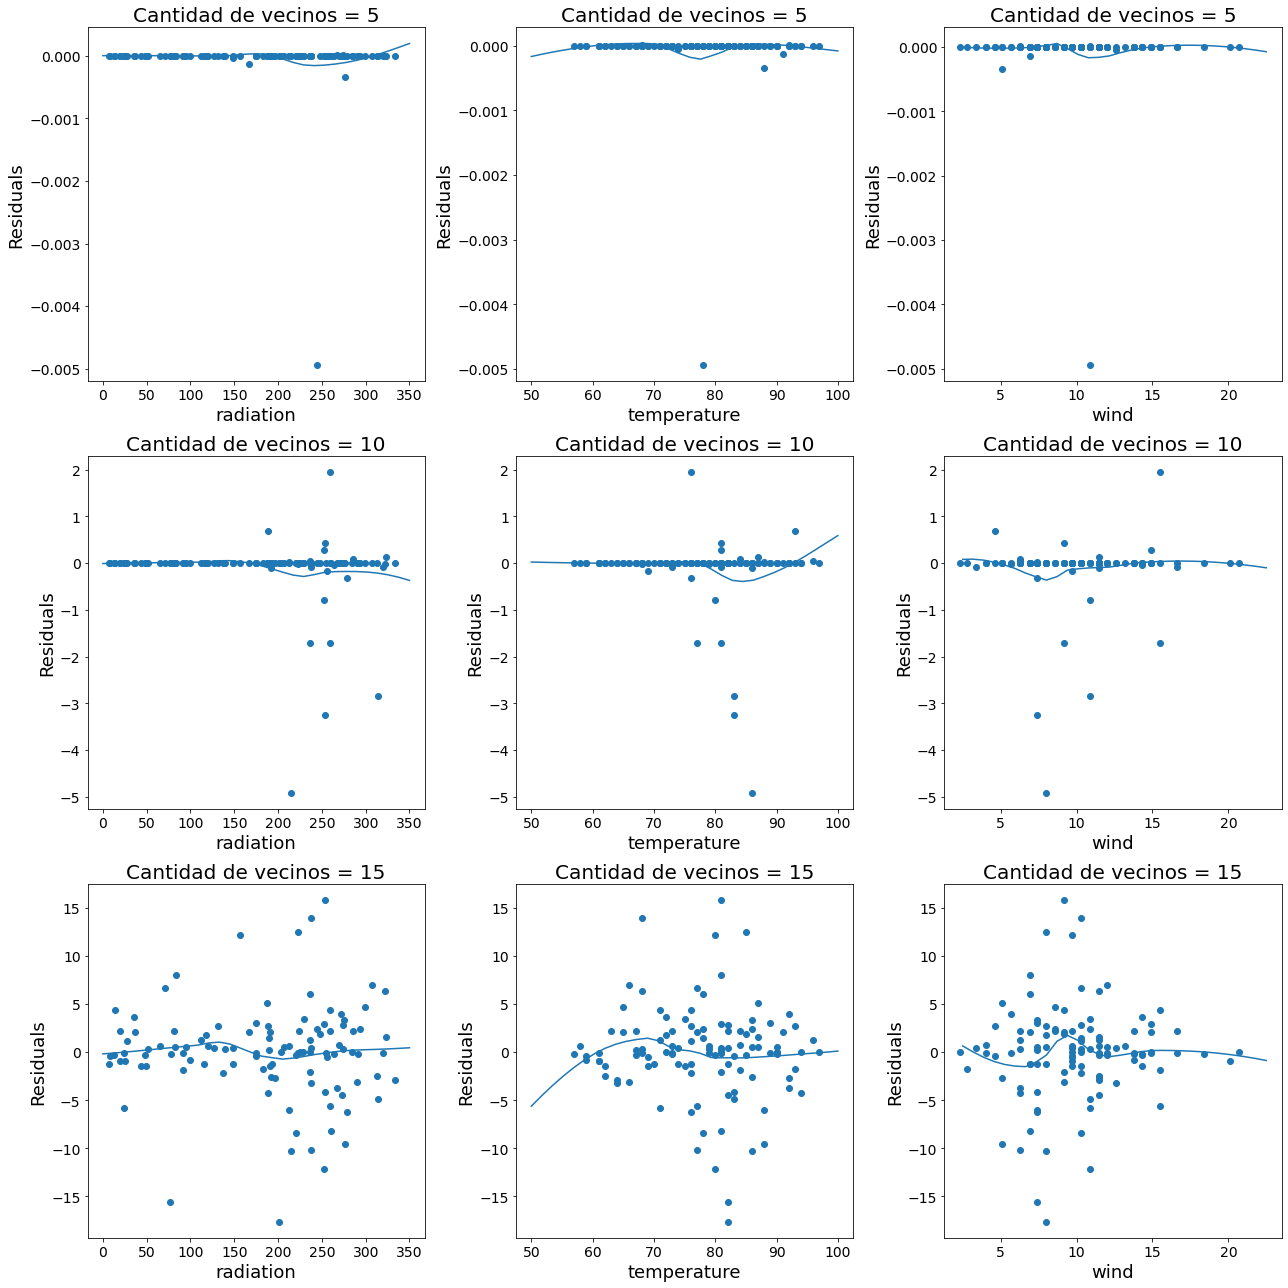

In [176]:
plt.rcParams["figure.figsize"] = (18, 18)
fig, ax = plt.subplots(3, 3)
for i, q in enumerate(qs):
    y_res = m.fit(X, y, q, grado)
    dataset["residuo"] = y - y_res
    for idx, vals in enumerate([("radiation", 0, 350), ("temperature", 50, 100), ("wind", 2.5, 22.5)]):
        ax[i][idx].scatter(dataset[vals[0]], dataset["residuo"])
        x_lin = np.linspace(vals[1], vals[2], 30)
        x_fit = [m.predict(dataset[vals[0]].to_numpy().reshape(-1, 1), dataset["residuo"].to_numpy(
        ).reshape(-1, 1), np.array([i]).reshape(1, 1), 74, grado) for i in x_lin]
        ax[i][idx].plot(x_lin, x_fit)
        ax[i][idx].set_xlabel(vals[0])
        ax[i][idx].set_ylabel("Residuals")
        ax[i][idx].set_title(f"Cantidad de vecinos = {q}")
plt.tight_layout()
#plt.savefig("img/fig5_vec.svg")
plt.show()

## Experimentación con el grado

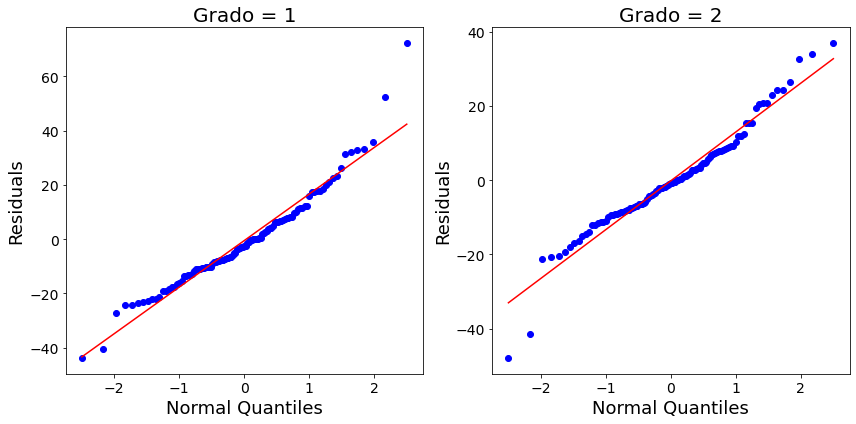

In [177]:
plt.rcParams["figure.figsize"] = (12, 6)
grados = [1, 2]
q = 44
q2 = 80
for idx, grado in enumerate(grados):
    y_res = m.fit(X, y, q, grado)
    dataset["residuo"] = y - y_res
    axis = plt.subplot(121+idx)
    res = stats.probplot(dataset["residuo"], dist="norm", plot=plt)
    axis.set_xlabel("Normal Quantiles")
    axis.set_title(f"Grado = {grado}")
    axis.set_ylabel("Residuals")
plt.tight_layout()
# plt.savefig("img/fig4a_grad.svg")
plt.show()

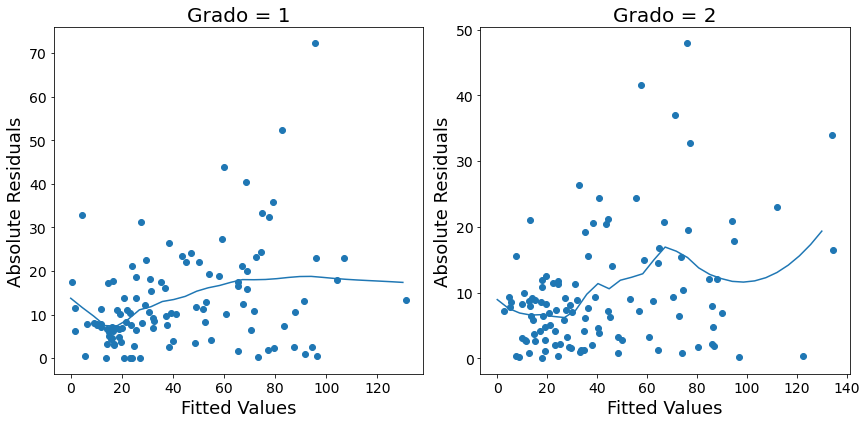

In [178]:
fig, ax = plt.subplots(1, 2)
for idx, grado in enumerate(grados):
    y_res = m.fit(X, y, q, grado)
    dataset["residuo"] = y - y_res
    ax[idx].scatter(y_res, np.abs(dataset["residuo"]))
    x_lin = np.linspace(0, 130, 30)
    x_fit = [m.predict(y_res.reshape(-1, 1), np.abs(dataset["residuo"].to_numpy()
                                                  ).reshape(-1, 1), np.array([i]).reshape(1, 1), q, grado) for i in x_lin]
    ax[idx].plot(x_lin, x_fit)
    ax[idx].set_xlabel("Fitted Values")
    ax[idx].set_ylabel("Absolute Residuals")
    ax[idx].set_title(f"Grado = {grado}")
plt.tight_layout()
#plt.savefig("img/fig4b_grad.svg")
plt.show()

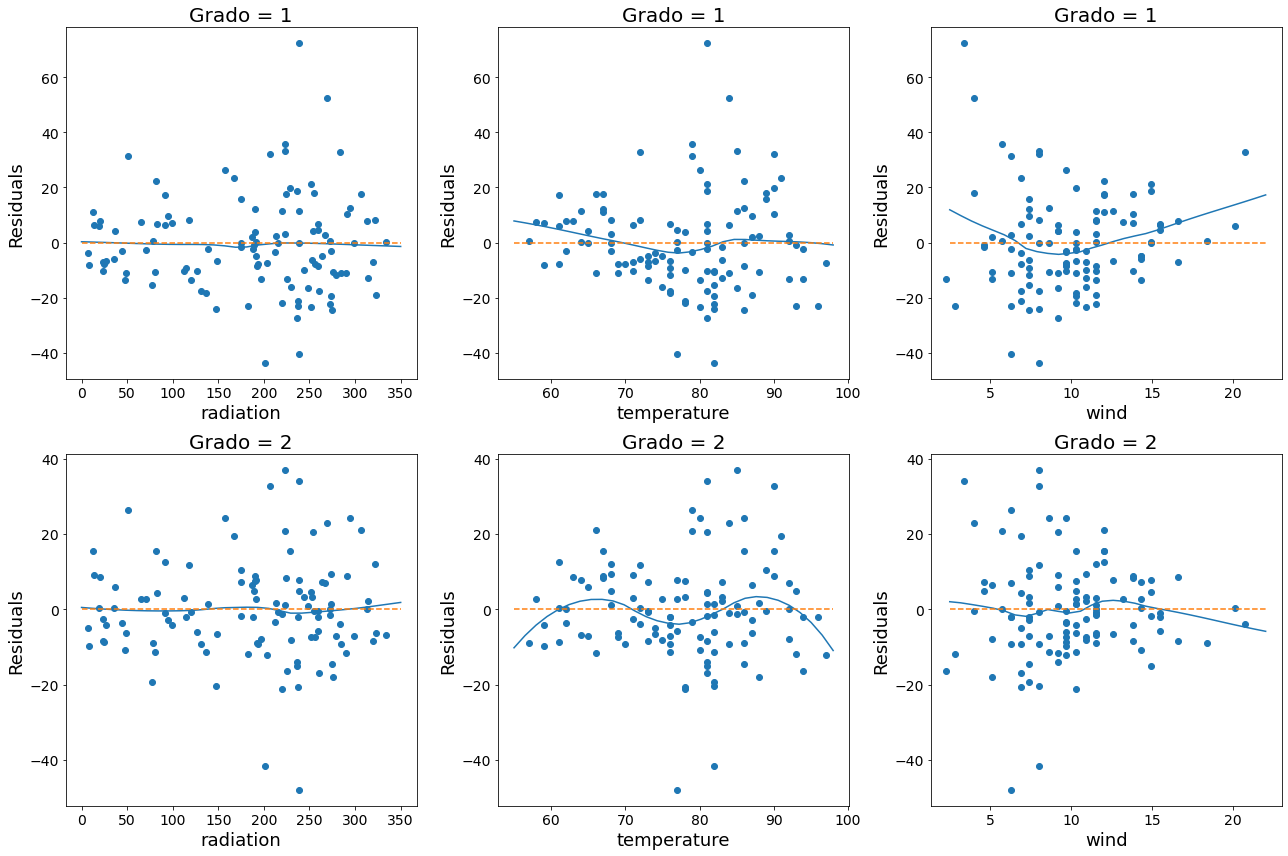

In [179]:
plt.rcParams["figure.figsize"] = (18, 12)
fig, ax = plt.subplots(2, 3)
for i, grado in enumerate(grados):
    y_res = m.fit(X, y, q, grado)
    dataset["residuo"] = y - y_res
    for idx, vals in enumerate([("radiation", 0, 350), ("temperature", 55, 98), ("wind", 2.5, 22)]):
        ax[i][idx].scatter(dataset[vals[0]], dataset["residuo"])
        x_lin = np.linspace(vals[1], vals[2], 30)
        x_fit = [m.predict(dataset[vals[0]].to_numpy().reshape(-1, 1), dataset["residuo"].to_numpy(
        ).reshape(-1, 1), np.array([i]).reshape(1, 1), q2, grado) for i in x_lin]
        ax[i][idx].plot(x_lin, x_fit)
        ax[i][idx].set_xlabel(vals[0])
        ax[i][idx].plot(x_lin, np.zeros(len(x_lin)), '--')
        ax[i][idx].set_ylabel("Residuals")
        ax[i][idx].set_title(f"Grado = {grado}")
plt.tight_layout()
plt.savefig("img/fig5_grad.svg")
plt.show()

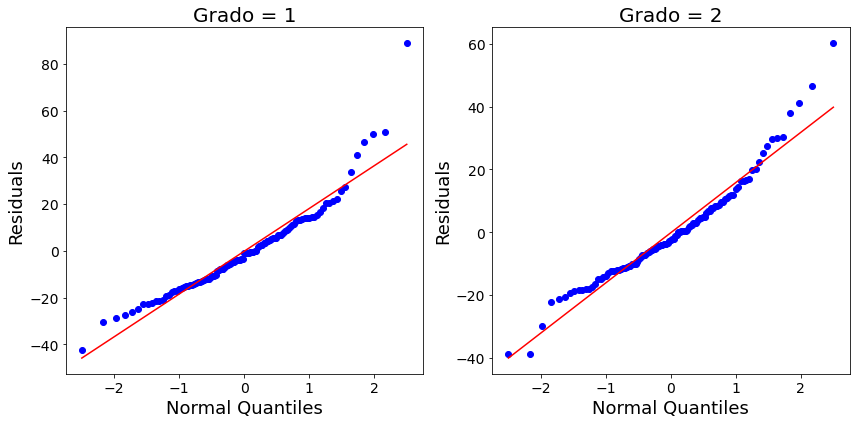

In [180]:
plt.rcParams["figure.figsize"] = (12, 6)
grados = [1, 2]
q = 88
for idx, grado in enumerate(grados):
    y_res = m.fit(X, y, q, grado)
    dataset["residuo"] = y - y_res
    axis = plt.subplot(121+idx)
    res = stats.probplot(dataset["residuo"], dist="norm", plot=plt)
    axis.set_xlabel("Normal Quantiles")
    axis.set_title(f"Grado = {grado}")
    axis.set_ylabel("Residuals")
plt.tight_layout()
# plt.savefig("img/fig4a_grad.svg")
plt.show()

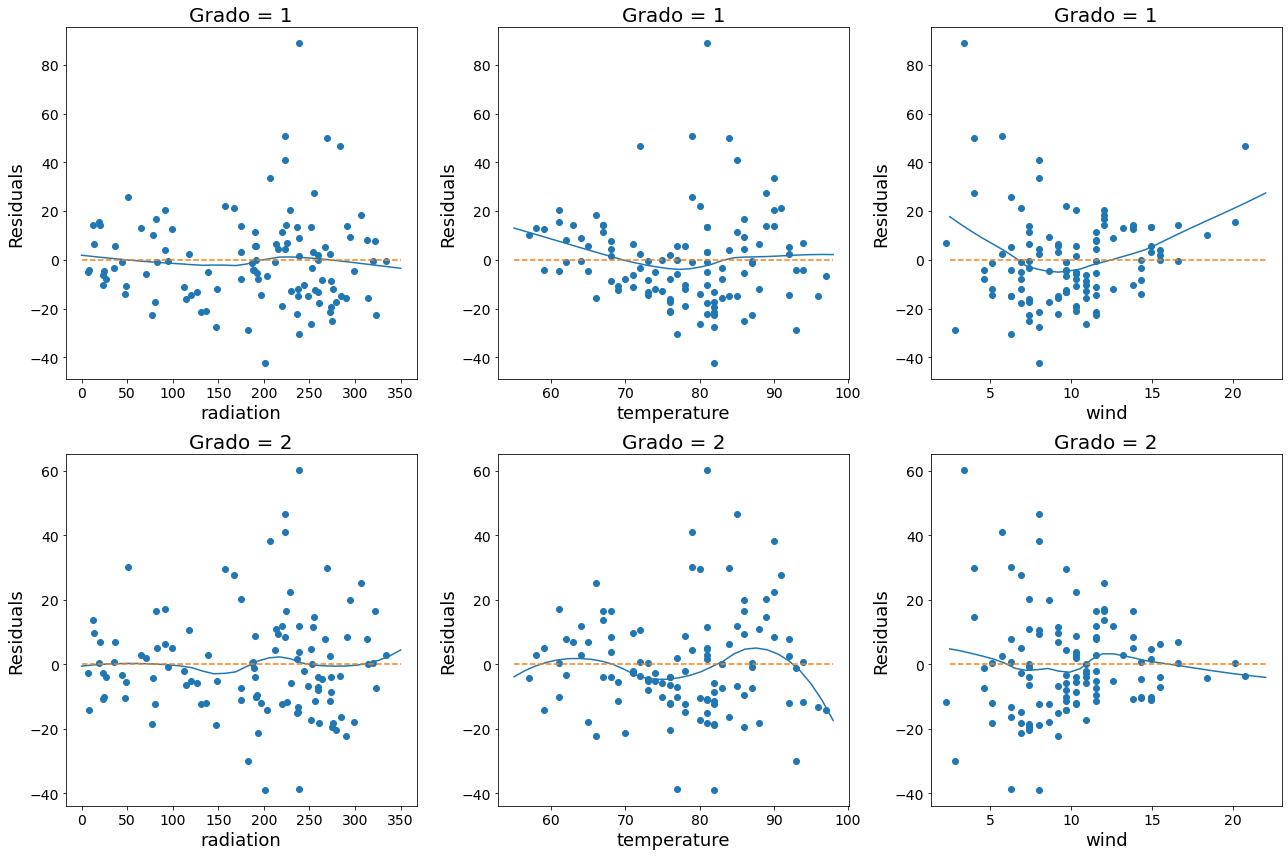

In [181]:
q=88
plt.rcParams["figure.figsize"] = (18, 12)
fig, ax = plt.subplots(2, 3)
for i, grado in enumerate(grados):
    y_res = m.fit(X, y, q, grado)
    dataset["residuo"] = y - y_res
    for idx, vals in enumerate([("radiation", 0, 350), ("temperature", 55, 98), ("wind", 2.5, 22)]):
        ax[i][idx].scatter(dataset[vals[0]], dataset["residuo"])
        x_lin = np.linspace(vals[1], vals[2], 30)
        x_fit = [m.predict(dataset[vals[0]].to_numpy().reshape(-1, 1), dataset["residuo"].to_numpy(
        ).reshape(-1, 1), np.array([i]).reshape(1, 1), q2, grado) for i in x_lin]
        ax[i][idx].plot(x_lin, x_fit)
        ax[i][idx].set_xlabel(vals[0])
        ax[i][idx].plot(x_lin, np.zeros(len(x_lin)), '--')
        ax[i][idx].set_ylabel("Residuals")
        ax[i][idx].set_title(f"Grado = {grado}")
plt.tight_layout()
plt.savefig("img/fig6_grad.svg")
plt.show()
q=44

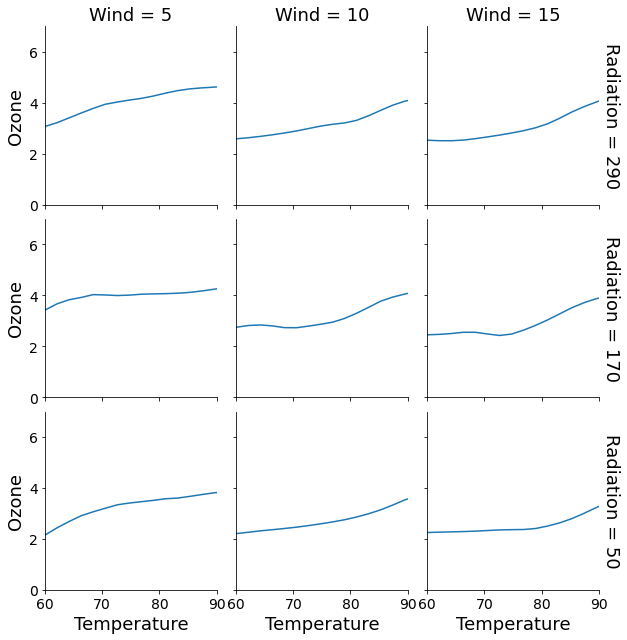

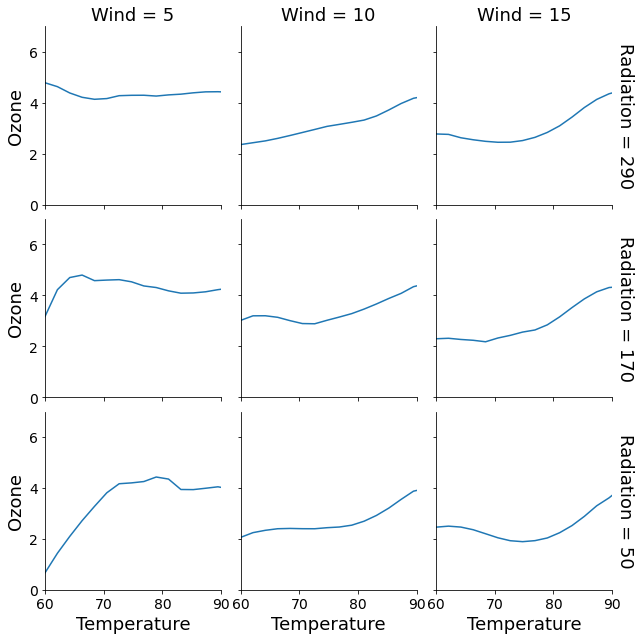

In [182]:
rad_vals = np.array([290, 170, 50])
wind_vals = np.array([5, 10, 15])
temp_lin = np.linspace(60, 100, 20)
cr_ozone = (y**(1/3)).reshape(-1, 1)
X = dataset[["radiation", "temperature", "wind"]].to_numpy()
for idx, grado in enumerate(grados):
    valores = []
    for i in rad_vals:
        for j in wind_vals:
            for k in temp_lin:
                valores += [m.predict(X, cr_ozone, np.array([i, k, j]).reshape(1, 3), q, grado, standardize=True)[0], i, k, j]

    df4 = pd.DataFrame(np.array(valores).reshape(20*9, 4), columns=["Ozone", "Radiation", "Temperature", "Wind"])
    df4["Radiation"] = df4["Radiation"].astype(int)
    df4["Wind"] = df4["Wind"].astype(int)
    cond_plot = sns.FacetGrid(data=df4, row="Radiation", col="Wind", margin_titles=True, row_order=[290, 170, 50])
    cond_plot.map(sns.lineplot, "Temperature", "Ozone")
    cond_plot.set(xlim=(60, 90), ylim=(0, 7))
    #plt.savefig(f'img/fig6_grad{grado}.svg')
plt.show()

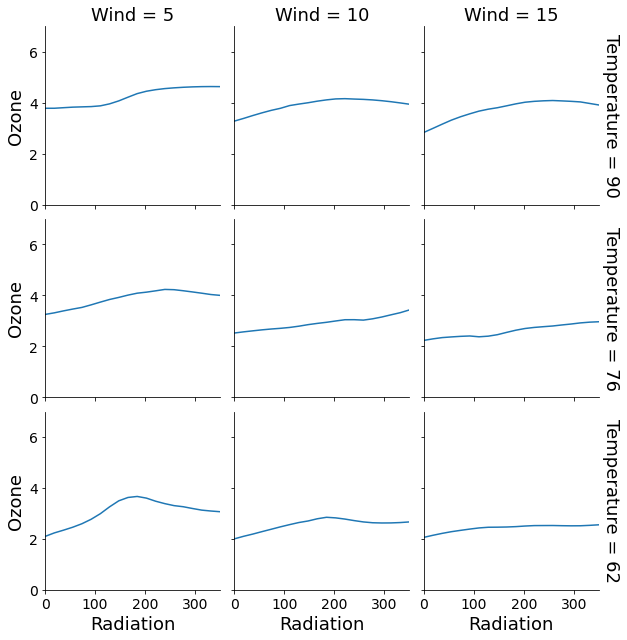

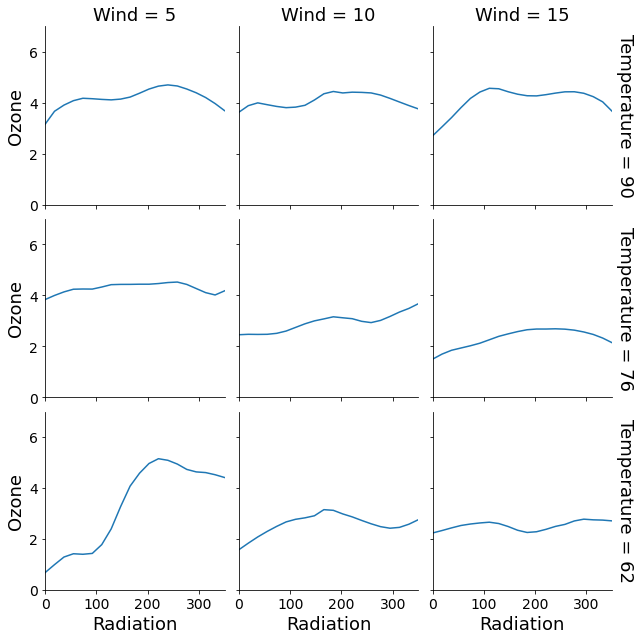

In [183]:
temp_vals = np.array([90, 76, 62])
wind_vals = np.array([5, 10, 15])
rad_lin = np.linspace(0, 350, 20)
cr_ozone = (y**(1/3)).reshape(-1, 1)
X = dataset[["radiation", "temperature", "wind"]].to_numpy()
for idx, grado in enumerate(grados):
    valores = []
    for i in temp_vals:
        for j in wind_vals:
            for k in rad_lin:
                valores += [m.predict(X, cr_ozone, np.array([k, i, j]
                                                            ).reshape(1, 3), q, grado, standardize=True)[0],  k, i, j]

    df4 = pd.DataFrame(np.array(valores).reshape(20*9, 4),
                    columns=["Ozone", "Radiation", "Temperature", "Wind"])
    df4["Temperature"] = df4["Temperature"].astype(int)
    df4["Wind"] = df4["Wind"].astype(int)
    cond_plot = sns.FacetGrid(data=df4, row="Temperature",
                            col="Wind", margin_titles=True, row_order=[90, 76, 62])
    cond_plot.map(sns.lineplot, "Radiation", "Ozone")
    cond_plot.set(xlim=(0, 350), ylim=(0, 7))
    #plt.savefig(f'img/fig7_grad{grado}.svg')
plt.show()

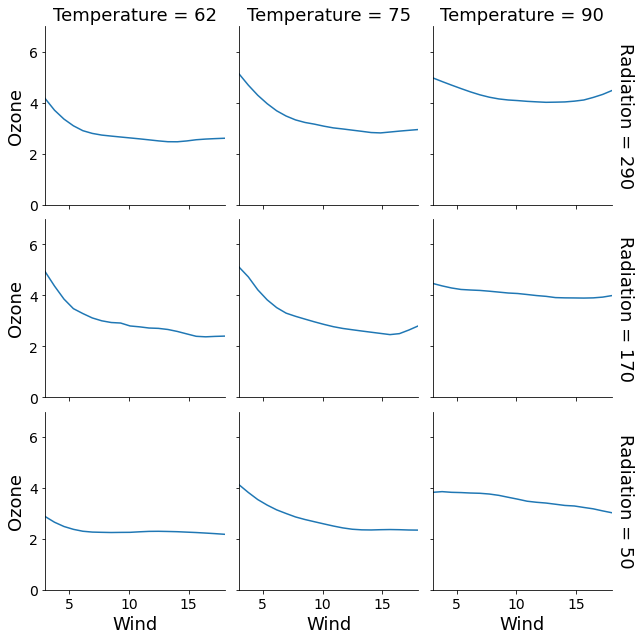

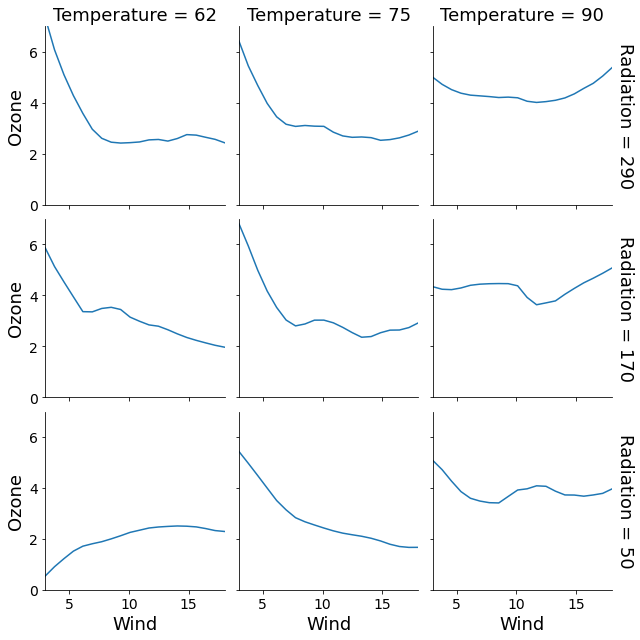

In [184]:
temp_vals = np.array([62, 75, 90])
rad_vals = np.array([290, 170, 50])
wind_lin = np.linspace(3, 18, 20)
cr_ozone = (y**(1/3)).reshape(-1, 1)
X = dataset[["radiation", "temperature", "wind"]].to_numpy()
for idx, grado in enumerate(grados):
    valores = []
    for i in temp_vals:
        for j in rad_vals:
            for k in wind_lin:
                valores += [m.predict(X, cr_ozone, np.array([j, i, k]
                                                            ).reshape(1, 3), q, grado, standardize=True)[0],  j, i, k]

    df4 = pd.DataFrame(np.array(valores).reshape(20*9, 4),
                    columns=["Ozone", "Radiation", "Temperature", "Wind"])
    df4["Temperature"] = df4["Temperature"].astype(int)
    df4["Radiation"] = df4["Radiation"].astype(int)
    cond_plot = sns.FacetGrid(data=df4, row="Radiation",
                            col="Temperature", margin_titles=True, row_order=[290, 170, 50])
    cond_plot.map(sns.lineplot, "Wind", "Ozone")
    cond_plot.set(xlim=(3, 18), ylim=(0, 7))
    #plt.savefig(f'img/fig8_grad{grado}.svg')
plt.show()

Experimento adicional de cantidad de vecinos:

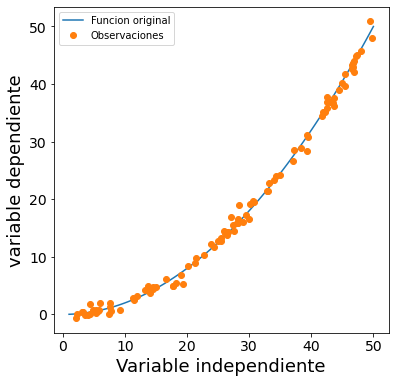

In [185]:
def f(x):
    return 1/50*x**(2)

xrandom = np.random.uniform(1,50,100)
xlin = np.linspace(1,50,100)

Y = f(xrandom) + np.random.normal(0, 1, len(xrandom))

plt.rcParams["figure.figsize"] = (6, 6)
plt.plot(xlin, f(xlin))
plt.plot(xrandom, Y, "o")
plt.legend(["Funcion original", "Observaciones"])
plt.xlabel("Variable independiente")
plt.ylabel("variable dependiente")
plt.savefig('img/datos.svg')

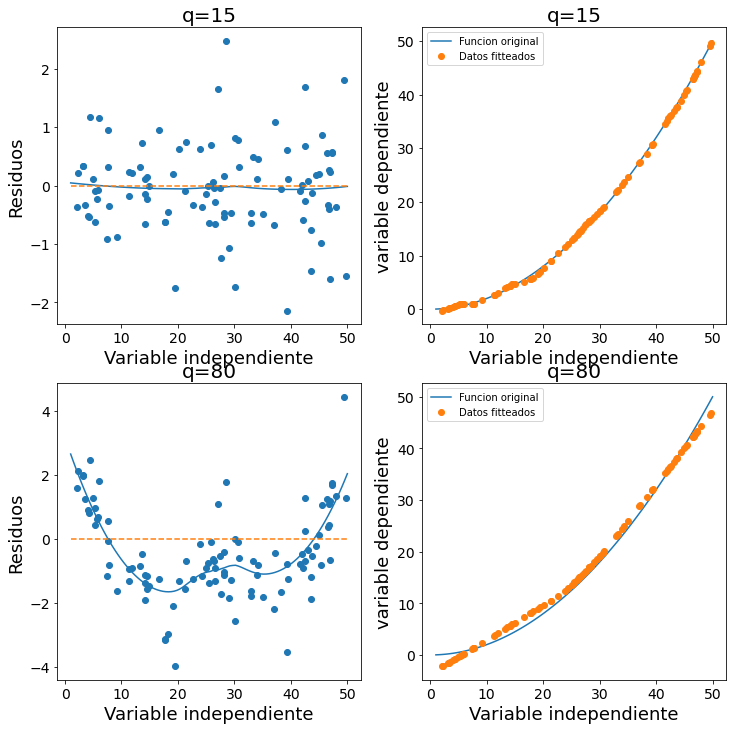

In [186]:
y_fit = m.fit(xrandom.reshape(-1,1), Y, 15, 1)

y_res = Y - y_fit
x_lin = xlin

plt.rcParams["figure.figsize"] = (12, 12)
fig, ax = plt.subplots(2, 2)
x_fit = [m.predict(xrandom.reshape(-1,1), y_res.reshape(-1,1), np.array([i]).reshape(1,1), 75, grado) for i in x_lin]
ax[0][0].scatter(xrandom, y_res)
ax[0][0].plot(x_lin, x_fit)
ax[0][0].plot(x_lin, np.zeros(len(x_lin)), '--')
ax[0][0].set_title("q=15")
ax[0][0].set_xlabel("Variable independiente")
ax[0][0].set_ylabel("Residuos")
ax[0][1].plot(xlin, f(xlin))
ax[0][1].plot(xrandom, y_fit, "o")
ax[0][1].legend(["Funcion original", "Datos fitteados"])
ax[0][1].set_title("q=15")
ax[0][1].set_xlabel("Variable independiente")
ax[0][1].set_ylabel("variable dependiente")
y_fit = m.fit(xrandom.reshape(-1,1), Y, 80, 1)
y_res = Y - y_fit
x_fit = [m.predict(xrandom.reshape(-1,1), y_res.reshape(-1,1), np.array([i]).reshape(1,1), 75, grado) for i in x_lin]
ax[1][0].scatter(xrandom, y_res)
ax[1][0].plot(x_lin, x_fit)
ax[1][0].plot(x_lin, np.zeros(len(x_lin)), '--')
ax[1][0].set_title("q=80")
ax[1][0].set_xlabel("Variable independiente")
ax[1][0].set_ylabel("Residuos")
ax[1][1].plot(xlin, f(xlin))
ax[1][1].plot(xrandom, y_fit, "o")
ax[1][1].legend(["Funcion original", "Datos fitteados"])
ax[1][1].set_title("q=80")
ax[1][1].set_xlabel("Variable independiente")
ax[1][1].set_ylabel("variable dependiente")
plt.savefig('img/fits.svg')